# Proyek Analisis Data: Bike Sharing

- Nama: Sheila Alvita Malakian
- Email: sheilaalvita27@gmail.com
- Id Dicoding: sheilaalvita

# Pertanyaan Bisnis

- Bagaimana performa Bike Sharing pada tahun 2012?
- Apakah performa Bike Sharing mengalami penurunan atau kenaikan pada pergantian tahun 2011 menuju 2012?
- Berapa persentase sewa sepeda pada per harinya?
- Musim apa yang memiliki jumlah sewa sepeda paling banyak?
- Apakah suhu dan kecepatan angin berpengaruh terhadap performa Bike Sharing?

# Library yang Dibutuhkan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.dates import MonthLocator
from matplotlib import style

# Data Wrangling
## Gathering Data

In [2]:
# Menampilkan Data Bike Sharing per Hour
hours_df = pd.read_csv("data/hour.csv")
hours_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [3]:
# Menampilkan Data Bike Sharing per Day
days_df = pd.read_csv("data/day.csv")
days_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## Assessing Data

In [4]:
# Menilai Data hours_df
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
print("Duplikasi: ", hours_df.duplicated().sum())
hours_df.describe()

Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Menilai Data days_df
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Duplikasi: ", hours_df.duplicated().sum())
hours_df.describe()

Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

In [8]:
# Membersihkan hours_df
hours_df.drop("instant", axis=1, inplace=True)
hours_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
tipe_datetime = ["dteday"]
 
for tipe in tipe_datetime:
  hours_df[tipe] = pd.to_datetime(hours_df[tipe])

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [10]:
# Membersihkan days_df
days_df.drop("instant", axis=1, inplace=True)
days_df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [11]:
tipe_datetime_kedua = ["dteday"]
 
for tipe in tipe_datetime_kedua:
  days_df[tipe] = pd.to_datetime(days_df[tipe])

days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


# Exploratory Data Analys (EDA)
## Explore

In [12]:
hours_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [13]:
# Mengubah Nama Data di hours_df
hours_df["season"] = hours_df["season"].replace({
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

hours_df["yr"] = hours_df["yr"].replace({
    0: 2011,
    1: 2012
})

hours_df["weekday"] = hours_df["weekday"].replace({
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
})

hours_df.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,2011,1,0,0,Sunday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,Springer,2011,1,1,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,Springer,2011,1,2,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,Springer,2011,1,3,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,Springer,2011,1,4,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,2011-01-01,Springer,2011,1,5,0,Sunday,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,2011-01-01,Springer,2011,1,6,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,2011-01-01,Springer,2011,1,7,0,Sunday,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,2011-01-01,Springer,2011,1,8,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,2011-01-01,Springer,2011,1,9,0,Sunday,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [14]:
hours_df.groupby(by="season").agg({
    "cnt": ["sum","max", "min"]
})

cnt         
              sum  max min
season                    
Fall      1061129  977   1
Springer   471348  801   1
Summer     918589  957   1
Winter     841613  967   1

In [15]:
hours_df.groupby(by="weathersit").agg({
    "cnt": ["sum","max", "min"]
})

cnt         
                sum  max min
weathersit                  
1           2338173  977   1
2            795952  957   1
3            158331  891   1
4               223  164  23

In [16]:
hours_df.sort_values(by="temp", ascending=True)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8721,2012-01-04,Springer,2012,1,5,0,Thursday,1,1,0.02,0.0455,0.41,0.1940,0,14,14
8719,2012-01-04,Springer,2012,1,3,0,Thursday,1,1,0.02,0.0152,0.34,0.2836,0,1,1
8720,2012-01-04,Springer,2012,1,4,0,Thursday,1,1,0.02,0.0455,0.41,0.1940,0,2,2
8722,2012-01-04,Springer,2012,1,6,0,Thursday,1,1,0.02,0.0455,0.41,0.1642,0,59,59
8723,2012-01-04,Springer,2012,1,7,0,Thursday,1,1,0.02,0.0455,0.44,0.1940,1,151,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936,2011-07-29,Fall,2011,7,14,0,Saturday,1,1,0.96,0.8636,0.30,0.2239,34,114,148
4937,2011-07-29,Fall,2011,7,15,0,Saturday,1,1,0.96,0.8636,0.30,0.2537,40,129,169
4938,2011-07-29,Fall,2011,7,16,0,Saturday,1,1,0.96,0.8636,0.30,0.3881,35,198,233
12972,2012-06-29,Fall,2012,6,17,0,Saturday,1,1,0.98,0.9242,0.34,0.1940,82,457,539


In [17]:
table = pd.pivot_table(hours_df, index="temp", columns="windspeed",
                       values="cnt", aggfunc="sum"
)
table.head()

windspeed,0.0000,0.0896,0.1045,0.1343,0.1642,0.1940,0.2239,0.2537,0.2836,0.2985,...,0.6119,0.6418,0.6567,0.6866,0.7164,0.7463,0.7761,0.8060,0.8358,0.8507
temp,,,,,,,,,,,,,,,,,,,,,
0.02,84.0,15.0,NaN,344.0,59.0,168.0,2.0,NaN,10.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.04,177.0,NaN,72.0,180.0,53.0,1.0,NaN,65.0,7.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.06,239.0,39.0,176.0,65.0,64.0,7.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.08,158.0,50.0,NaN,59.0,2.0,108.0,NaN,26.0,44.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.10,280.0,31.0,123.0,484.0,465.0,304.0,147.0,71.0,11.0,63.0,...,NaN,NaN,NaN,14.0,1.0,NaN,NaN,NaN,NaN,NaN


In [18]:
# Mengubah Nama Data di days_df
days_df["season"] = days_df["season"].replace({
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

days_df["yr"] = days_df["yr"].replace({
    0: 2011,
    1: 2012
})

days_df["weekday"] = days_df["weekday"].replace({
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
})

days_df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,2011,1,0,Sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Springer,2011,1,0,Monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Springer,2011,1,0,Tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Springer,2011,1,0,Wednesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Springer,2011,1,0,Thursday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,2011-01-06,Springer,2011,1,0,Friday,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,2011-01-07,Springer,2011,1,0,Saturday,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,2011-01-08,Springer,2011,1,0,Sunday,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,2011-01-09,Springer,2011,1,0,Monday,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,2011-01-10,Springer,2011,1,0,Tuesday,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [19]:
days_df.groupby(by="season").agg({
    "cnt": ["sum","max", "min"]
})

cnt            
              sum   max   min
season                       
Fall      1061129  8714  1115
Springer   471348  7836   431
Summer     918589  8362   795
Winter     841613  8555    22

In [20]:
days_df.groupby(by="weathersit").agg({
    "cnt": ["sum","max", "min"]
})

cnt           
                sum   max  min
weathersit                    
1           2257952  8714  431
2            996858  8362  605
3             37869  4639   22

In [21]:
days_df.sort_values(by="temp", ascending=True)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
21,2011-01-22,Springer,2011,1,0,Sunday,0,1,0.059130,0.079070,0.400000,0.171970,93,888,981
22,2011-01-23,Springer,2011,1,0,Monday,0,1,0.096522,0.098839,0.436522,0.246600,150,836,986
23,2011-01-24,Springer,2011,1,0,Tuesday,1,1,0.097391,0.117930,0.491739,0.158330,86,1330,1416
368,2012-01-04,Springer,2012,1,0,Thursday,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
407,2012-02-12,Springer,2012,2,0,Monday,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2012-06-29,Fall,2012,6,0,Saturday,1,1,0.834167,0.786613,0.488750,0.165417,829,4634,5463
209,2011-07-29,Fall,2011,7,0,Saturday,1,1,0.838333,0.785967,0.542500,0.174138,670,3176,3846
202,2011-07-22,Fall,2011,7,0,Saturday,1,1,0.848333,0.840896,0.580417,0.133100,562,2825,3387
203,2011-07-23,Fall,2011,7,0,Sunday,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285


In [22]:
days_df.sort_values(by="windspeed", ascending=True)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
279,2011-10-07,Winter,2011,10,0,Saturday,1,1,0.510833,0.504404,0.684167,0.022392,949,4036,4985
282,2011-10-10,Winter,2011,10,1,Tuesday,0,1,0.570833,0.542925,0.733750,0.042304,1514,3603,5117
280,2011-10-08,Winter,2011,10,0,Sunday,0,1,0.521667,0.513242,0.701250,0.045404,2235,3174,5409
37,2011-02-07,Springer,2011,2,0,Tuesday,1,1,0.271667,0.303658,0.738333,0.045408,120,1592,1712
695,2012-11-26,Winter,2012,11,0,Tuesday,1,1,0.313333,0.339004,0.535417,0.046650,337,4750,5087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2011-02-14,Springer,2011,2,0,Tuesday,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
420,2012-02-25,Springer,2012,2,0,Sunday,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732
292,2011-10-20,Winter,2011,10,0,Friday,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
432,2012-03-08,Springer,2012,3,0,Friday,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382


In [23]:
tables = pd.pivot_table(days_df, index="temp", columns="windspeed",
                       values="cnt", aggfunc="sum"
)
tables.head()

windspeed,0.022392,0.042304,0.045404,0.045408,0.046650,0.047275,0.050379,0.052871,0.053213,0.057225,...,0.398008,0.407346,0.409212,0.414800,0.415429,0.417908,0.421642,0.422275,0.441563,0.507463
temp,,,,,,,,,,,,,,,,,,,,,
0.059130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.096522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.097391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.107500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.127500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1529.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization & Explanatory Analysis

## Bagaimana performa Bike Sharing pada tahun 2012?

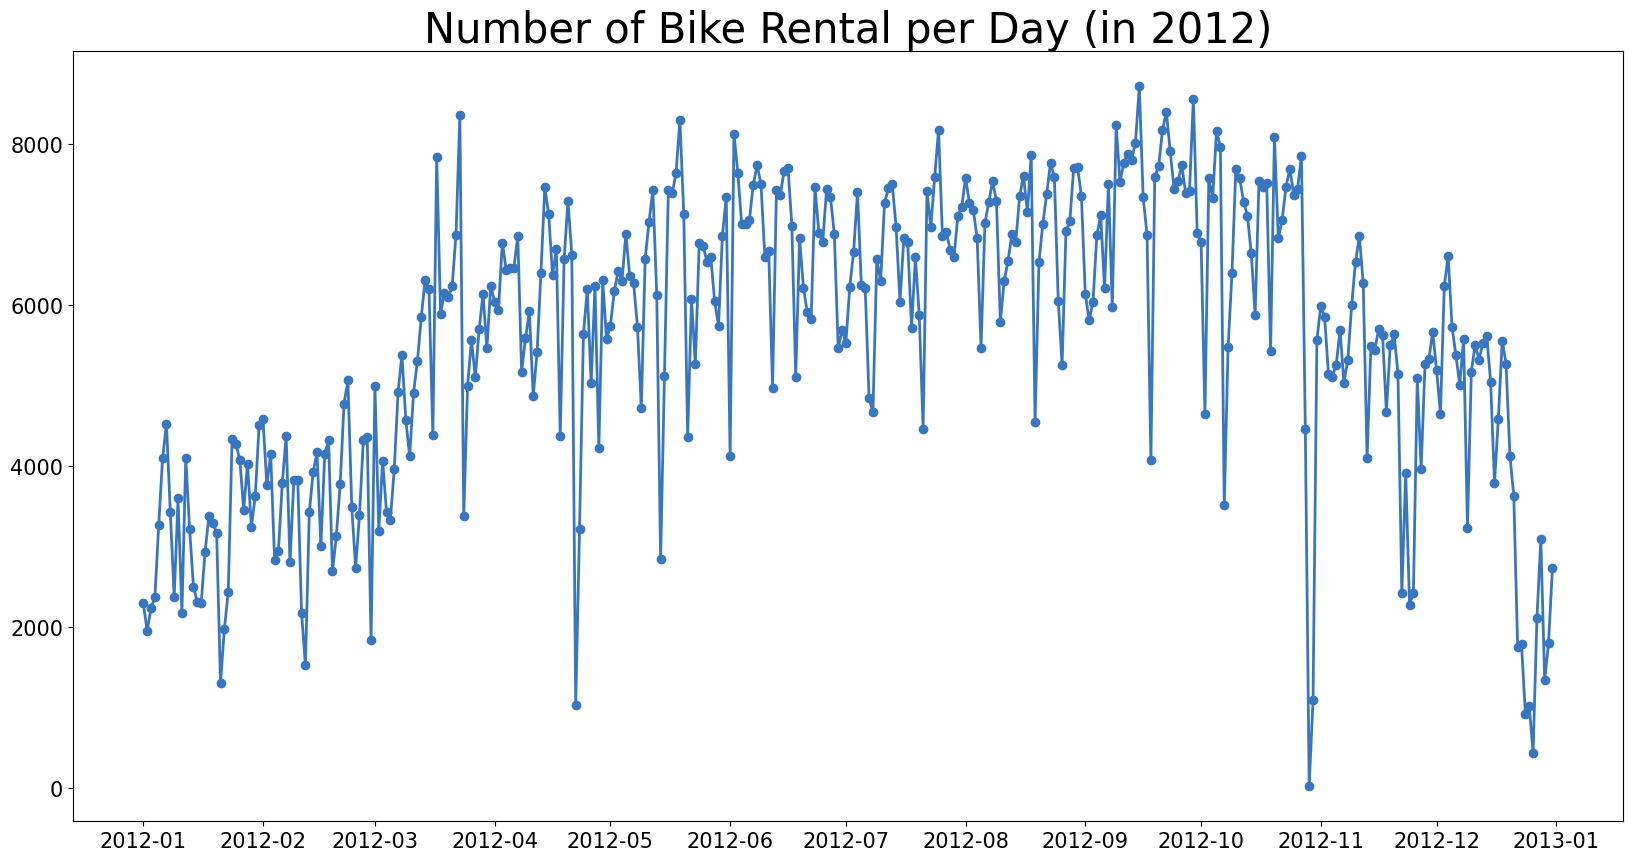

In [24]:
# Grafik Data per Hari Dalam 12 Bulan pada Tahun 2012

data_2012 = days_df[days_df["dteday"].dt.year == 2012]

plt.figure(figsize = (20, 10))
plt.plot(
    data_2012["dteday"],
    data_2012["cnt"],
    marker = "o",
    linewidth = 2,
    color = "#3876BF")
plt.title("Number of Bike Rental per Day (in 2012)",
          loc = "center",
          fontsize = "30")

ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=1))

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.style.use(style="fivethirtyeight")
plt.show()

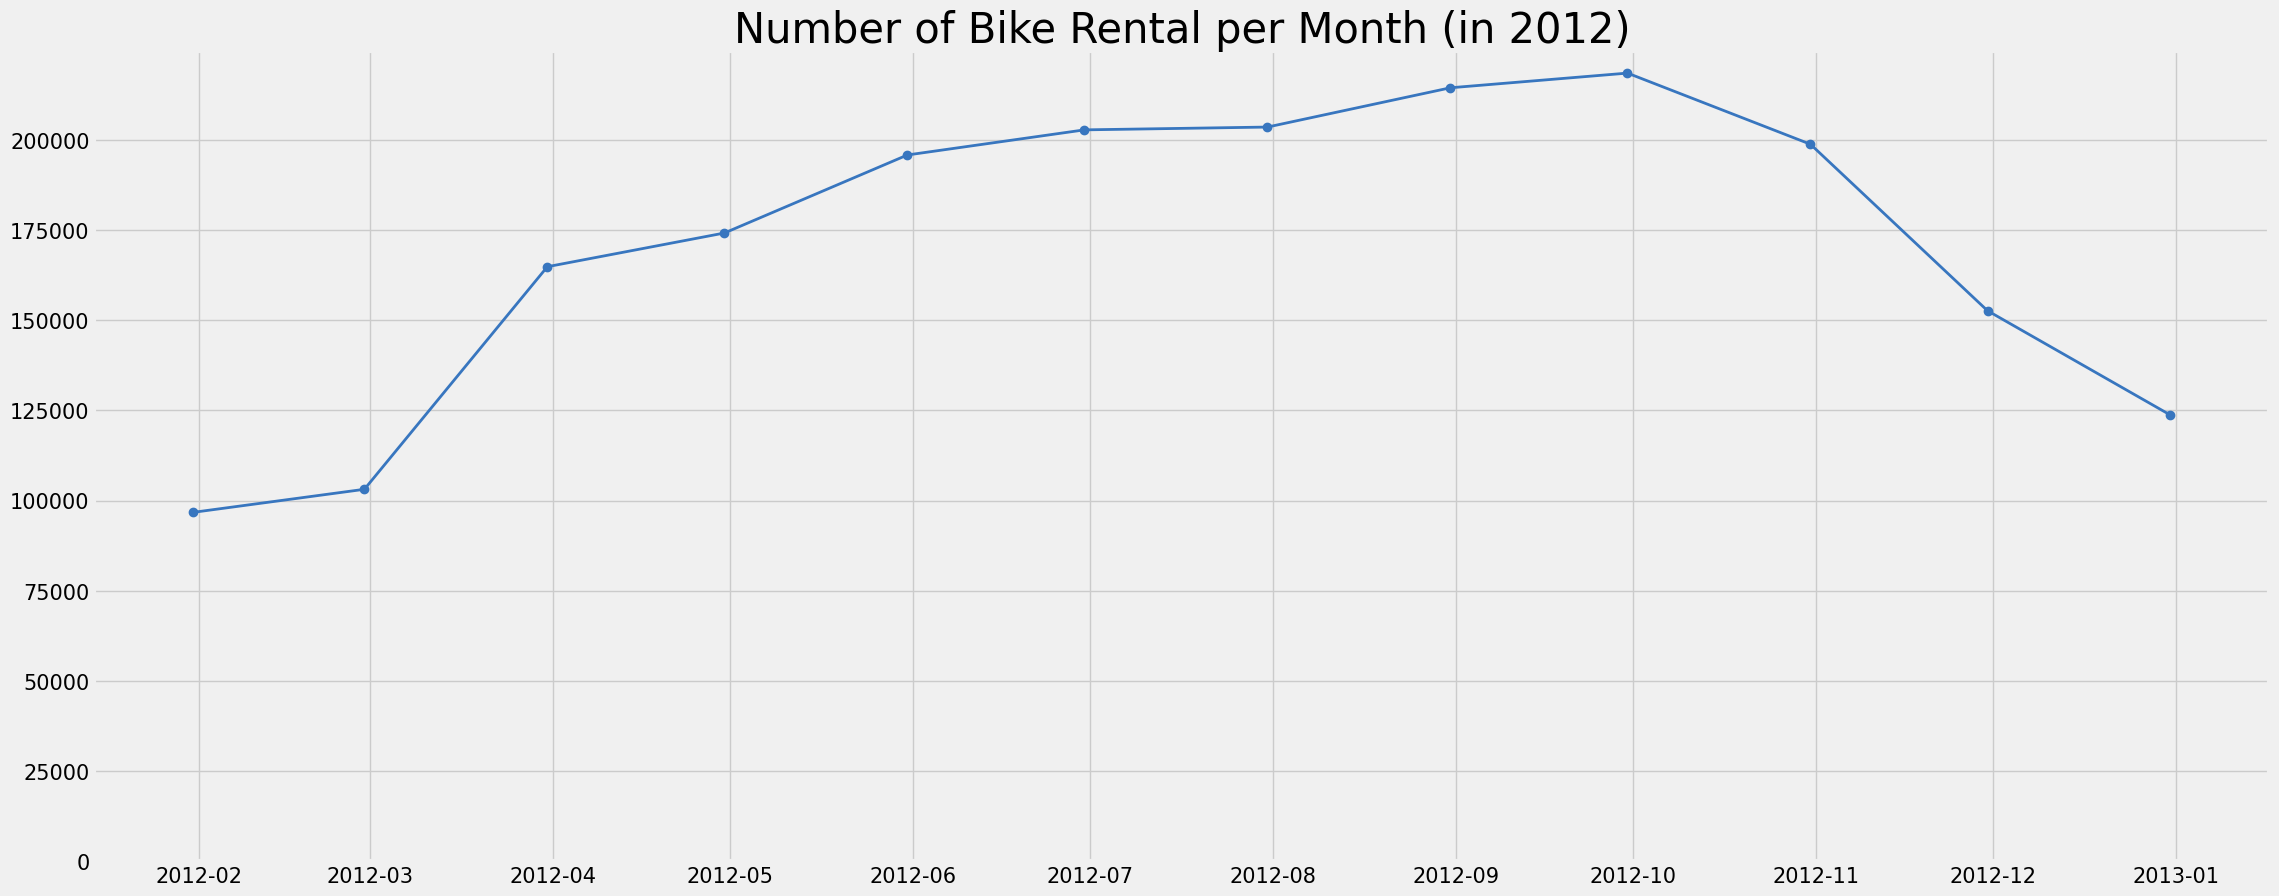

In [25]:
# Grafik Data per Bulan pada Tahun 2012

monthly_df = days_df.resample("M", on="dteday").sum()
data_2012 = monthly_df[monthly_df.index.year == 2012]

plt.figure(figsize = (25, 10))
plt.plot(
    data_2012.index,
    data_2012["cnt"],
    marker = "o",
    linewidth = 2,
    color = "#3876BF")
plt.title("Number of Bike Rental per Month (in 2012)",
          loc = "center",
          fontsize = "30")

ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=1))

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.style.use(style="default")
plt.ylim(ymin=0)
plt.show()

## Apakah performa Bike Sharing mengalami penurunan atau kenaikan pada pergantian tahun 2011 menuju 2012?

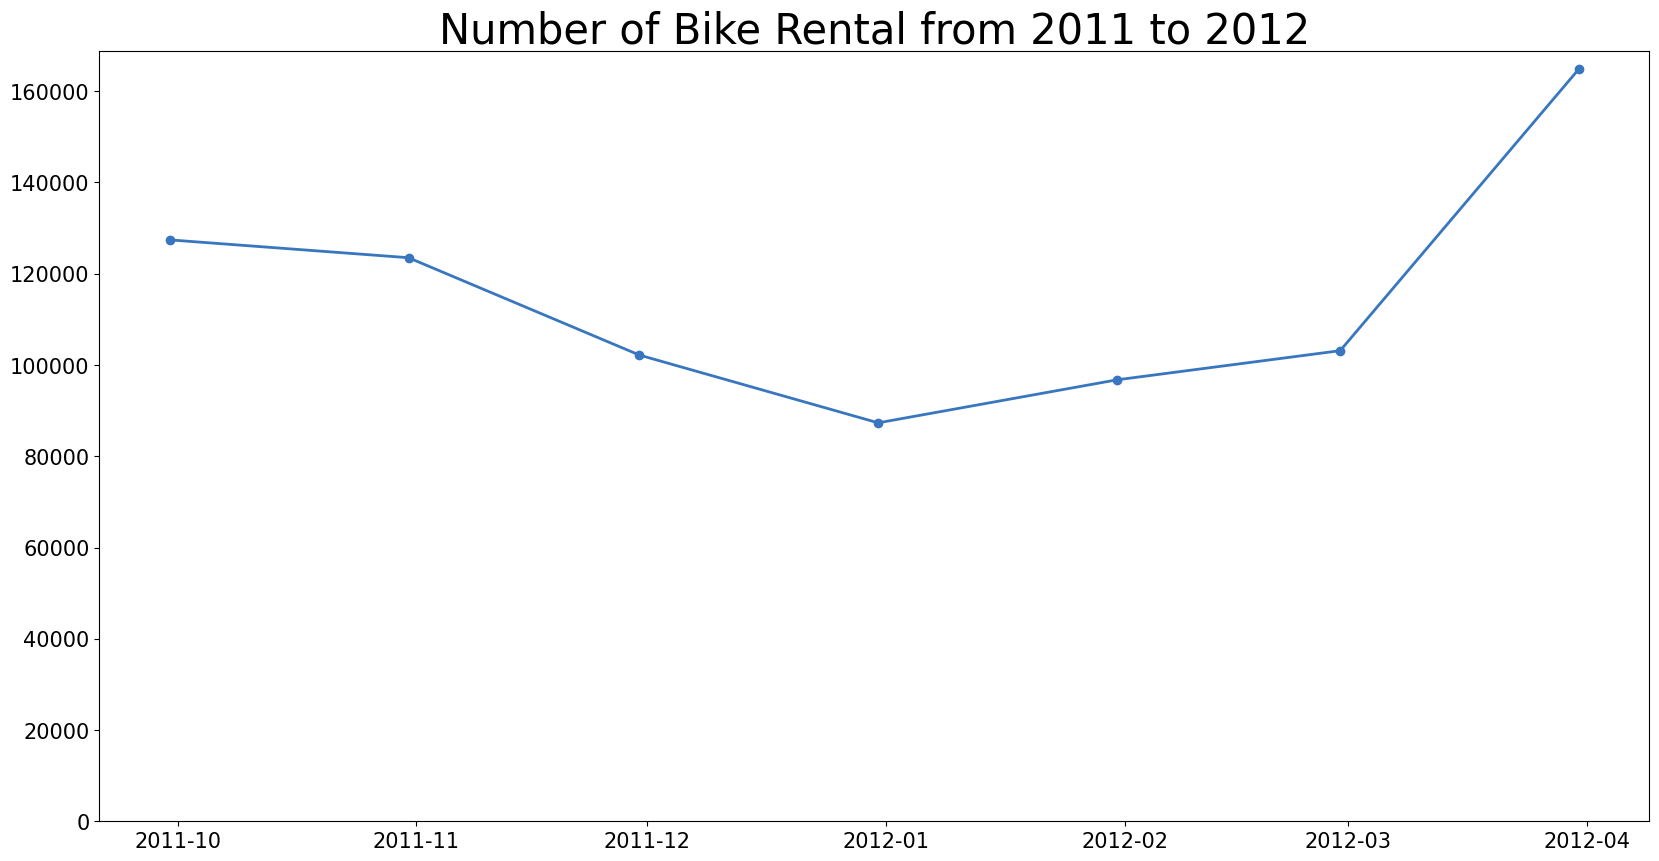

In [26]:
monthly_df = days_df.resample("M", on="dteday").sum()
range_df = monthly_df[(monthly_df.index >= "2011-09") &
                      (monthly_df.index <= "2012-04")]

plt.figure(figsize = (20, 10))
plt.plot(
    range_df.index,
    range_df["cnt"],
    marker = "o",
    linewidth = 2,
    color = "#3876BF")
plt.title("Number of Bike Rental from 2011 to 2012",
          loc = "center",
          fontsize = "30")

ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=1))

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(ymin=0)
plt.show()

## Berapa persentase sewa sepeda pada per harinya?

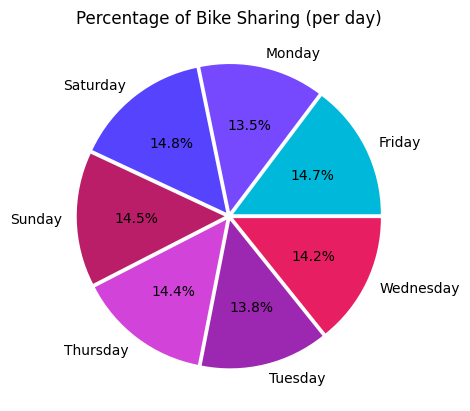

In [75]:
perday_df = days_df.groupby("weekday")["cnt"].sum()
colors = ["#00B8D9", "#7649FE", "#5643FD", "#BA1E68", "#D244D9", "#9C27B0", "#E81E63"]

plt.pie(
    x = perday_df,
    labels = perday_df.index,
    colors = colors,
    autopct = "%1.1f%%",
    explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03)
)

plt.title("Percentage of Bike Sharing (per day)")
plt.show()

## Musim apa yang memiliki jumlah sewa sepeda paling banyak?

C:\Users\Sheila\AppData\Local\Temp\ipykernel_27980\1678948071.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


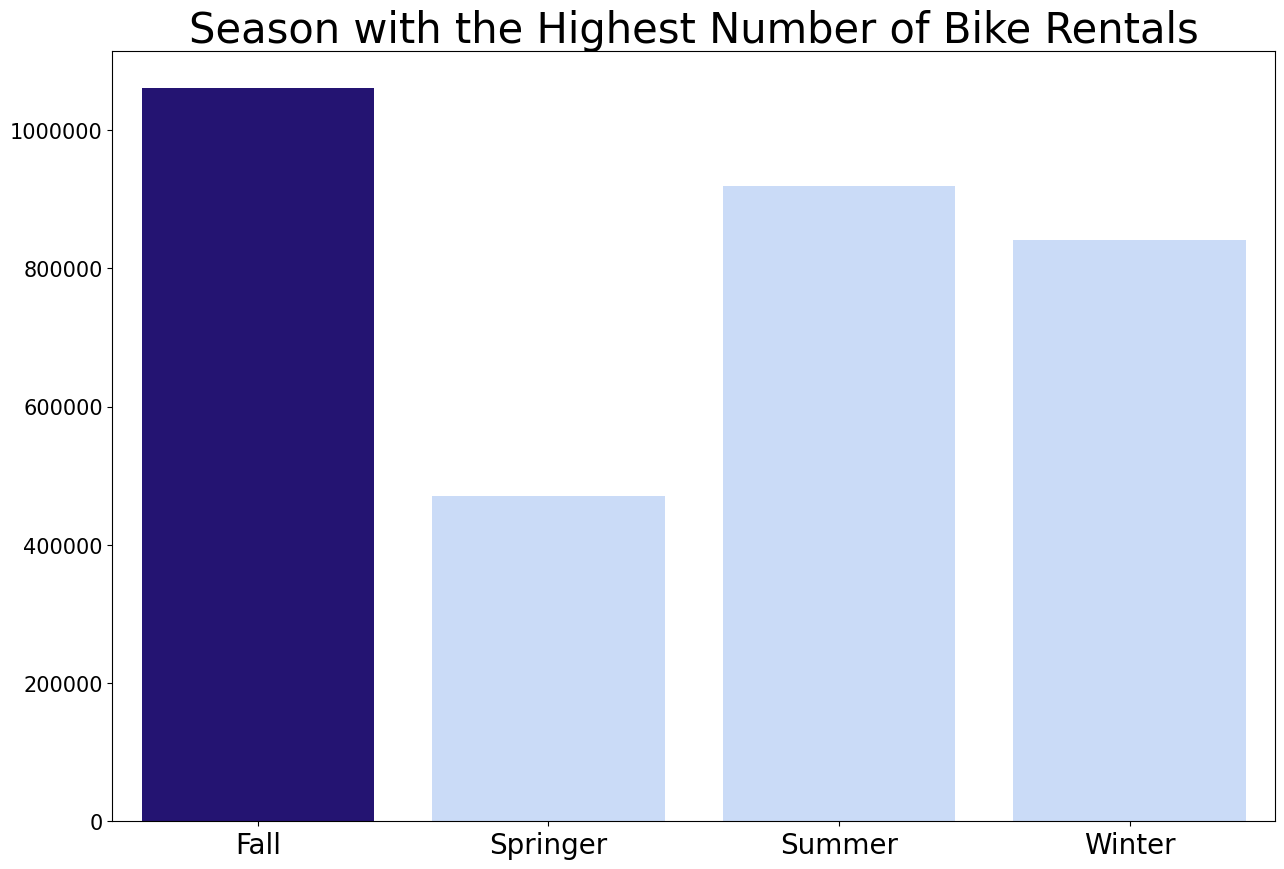

In [27]:
season_df = days_df.groupby('season')
rental_in_seasons = season_df['cnt'].sum().reset_index()

plt.figure(figsize=(15, 10))
color = ["#190482", "#C2D9FF", "#C2D9FF", "#C2D9FF"]

sns.barplot(
    x = "season",
    y = "cnt",
    data = rental_in_seasons,
    palette = color
)

plt.title("Season with the Highest Number of Bike Rentals",
          fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.ticklabel_format(style='plain', axis = "y")
plt.show()

## Apakah suhu dan kecepatan angin berpengaruh terhadap performa Bike Sharing?

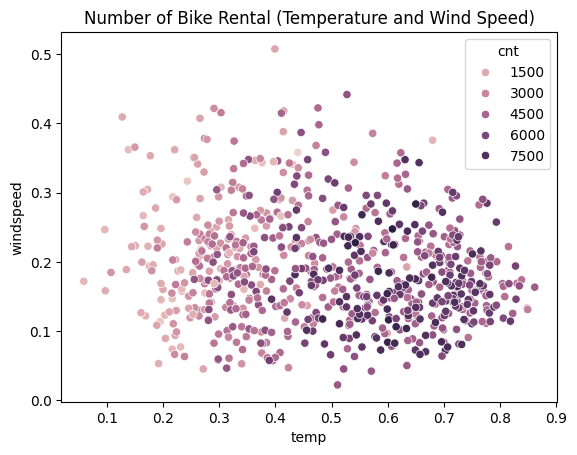

In [28]:
sns.scatterplot(data = days_df, x = "temp", y = "windspeed", hue = "cnt")
plt.title("Number of Bike Rental (Temperature and Wind Speed)")
plt.show()

In [203]:
days_df.to_csv("main_data.csv", index=False)

# Conclusion

Berdasarkan visualisasi data di atas, dapat diambil informasi bahwa:
- Performa Bike Sharing pada 2012 mengalami peningkatan yang stabil dari bulan April hingga Oktober, untuk kemudian mengalami penuruan pada November dan Desember
- Performa Bike Sharing mengalami penurunan pada pergantian tahun 2011 ke 2012
- Persentase sewa sepeda paling besar, yaitu 14.8% di hari Sabtu
- Musim Gugur (Fall) merupakan musim di mana jumlah sewa sepeda mencapai jumlah tertinggi
- Semakin tinggi suhu dan semakin pelan kecepatan angin, penyewa sepeda semakin banyak. Sebaliknya, semakin kecil suhu dan semakin kencang kecepatan angin, penyewa sepeda semakin sedikit